<a href="https://colab.research.google.com/github/jumadi-cloud/prediksi_harga_mobil/blob/main/Scraping_Carmudi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scraping Data Mobil Bekas [Carmudi](https://www.carmudi.co.id/mobil-dijual/indonesia?)

In [ ]:
!pip install beautifulsoup4 requests pandas openpyxl

In [ ]:
import os
import json
import time
import requests
import pandas as pd
from bs4 import BeautifulSoup
from IPython.display import display

# Link dan headers
link = 'https://www.carmudi.co.id/mobil-dijual/indonesia?'
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'
}

# Fungsi utama
def run():
    try:
        pages = int(input('Masukkan jumlah halaman yang ingin di-scrape (contoh: 10): '))
        if pages <= 0:
            print("Masukkan angka lebih dari 0.")
            return
    except:
        print("Masukkan angka yang valid.")
        return

    all_data = []

    for j in range(1, pages + 1):
        print(f"🔎 Scraping halaman {j}...")
        params = {
            'page_number': j,
            'page_size': 50
        }
        try:
            req = requests.get(link, params=params, headers=headers)
            soup = BeautifulSoup(req.text, 'html.parser')
            mainsoup = soup.find_all('div', 'flex flex--row flex--wrap')

            for i in mainsoup:
                try:
                    links = i.find('a', 'ellipsize js-ellipsize-text')['href']
                    reqtwo = requests.get(links)
                    souptwo = BeautifulSoup(reqtwo.text, 'html.parser')

                    title = i.find('a', 'ellipsize js-ellipsize-text').text.strip().replace('/', '')
                    price = i.find('div', 'listing__price delta weight--bold').text if i.find('div', 'listing__price delta weight--bold') else 'Best Deal'
                    img = i.find('a', 'listing__overlay one-whole inline--block valign--top relative').find('img').get('data-src', '')
                    desc = souptwo.find('span', {'itemprop': 'description'}).text.strip().replace('\n', ' ').replace('Tawaran Terbaik dari Carmudi.co.id ', '') if souptwo.find('span', {'itemprop': 'description'}) else ''
                    km = i.find('i', 'icon icon--secondary muted valign--top push-quarter--right icon--meter').next_sibling.strip()
                    trans = i.find('i', 'icon icon--secondary muted valign--top push-quarter--right icon--transmission').next_sibling.strip()
                    loc = i.find('i', 'icon icon--secondary muted valign--top push-quarter--right icon--location').next_sibling.strip()

                    datt = {
                        'title': title,
                        'price': price,
                        'img': img,
                        'desc': desc,
                        'km': km,
                        'trans': trans,
                        'loc': loc,
                        'link': links
                    }
                    all_data.append(datt)
                    print(f"{title} | {price} | {km} | {trans} | {loc}")
                except Exception as e:
                    print(f"❌ Error scraping item: {e}")
                    continue

        except Exception as e:
            print(f"❌ Error mengakses halaman {j}: {e}")
        time.sleep(1)  # jeda agar tidak diblokir

    # Buat folder penyimpanan
    os.makedirs('resultfile/file/custom', exist_ok=True)

    # Simpan ke berbagai format
    df = pd.DataFrame(all_data)
    df.to_csv('/content/drive/MyDrive/Projek/LEGOAS/all_data_page_1_to_10.csv', index=False)
    df.to_excel('/content/drive/MyDrive/Projek/LEGOAS/all_data_page_1_to_10.xlsx', index=False)
    with open('/content/drive/MyDrive/Projek/LEGOAS/all_data_page_1_to_10.json', 'w') as f:
        json.dump(all_data, f)

    print("✅ Semua data disimpan di folder: resultfile/file/custom/")

    # Tampilkan DataFrame
    display(df)

# Jalankan fungsi
run()


Masukkan jumlah halaman yang ingin di-scrape (contoh: 10): 15
🔎 Scraping halaman 1...
2019 Toyota Agya 1.2 TRD Hatchback - MANUAL FACELIFT | Rp 120.000.000 | 30 - 35K KM | Manual | Jawa Timur
2025 Toyota Rush 1.5 GR Sport SUV - 1,5 Matic Putih harga Cash Kredit Murah | Rp 261.800.000 | - KM | Automatic | Jawa Barat
2025 Toyota Agya 1.2 G Hatchback - 1,2 Matic Warna Merah Harga Murah Cash Kredit | Rp 143.800.000 | - KM | Automatic | DKI Jakarta
2025 Toyota Alphard 2.5 G (Premium Color) MPV - 2,5 Bensin Warna Putih | Rp 1.386.500.000 | - KM | Automatic | DKI Jakarta
2018 Toyota Kijang Innova 2.0 V MPV - HARGA NEGO KUALITAS TERJAMIN | Rp 238.900.000 | 60 - 65K KM | Manual | DKI Jakarta
2025 Toyota Rush 1.5 GR Sport SUV - 1,5 Matic Warna Putih Harga Cash Kredit Hub Kami | Rp 256.800.000 | - KM | Automatic | Jawa Barat
2025 Toyota Raize 1.0 GR Sport (1 Tone) SUV - 1,0 Warna Biru Harga Murah Cash Kredit | Rp 247.600.000 | - KM | Automatic | Banten
2023 Honda WR-V 1.5 RS SUV - NIS | Rp 258.00

,title,price,img,desc,km,trans,loc,link
0,2019 Toyota Agya 1.2 TRD Hatchback - MANUAL FA...,Rp 120.000.000,https://img2.icarcdn.com/15961071/main-m_mobil...,,30 - 35K KM,Manual,Jawa Timur,https://www.carmudi.co.id/dijual/toyota-agya-t...
1,"2025 Toyota Rush 1.5 GR Sport SUV - 1,5 Matic ...",Rp 261.800.000,https://img2.icarcdn.com/34961071/main-m_mobil...,,- KM,Automatic,Jawa Barat,https://www.carmudi.co.id/dijual/toyota-rush-g...
2,"2025 Toyota Agya 1.2 G Hatchback - 1,2 Matic W...",Rp 143.800.000,https://img4.icarcdn.com/14961071/main-m_mobil...,,- KM,Automatic,DKI Jakarta,https://www.carmudi.co.id/dijual/toyota-agya-g...
3,2025 Toyota Alphard 2.5 G (Premium Color) MPV ...,Rp 1.386.500.000,https://img4.icarcdn.com/04961071/main-m_mobil...,,- KM,Automatic,DKI Jakarta,https://www.carmudi.co.id/dijual/toyota-alphar...
4,2018 Toyota Kijang Innova 2.0 V MPV - HARGA NE...,Rp 238.900.000,https://img2.icarcdn.com/93961071/main-m_mobil...,,60 - 65K KM,Manual,DKI Jakarta,https://www.carmudi.co.id/dijual/toyota-kijang...
...,...,...,...,...,...,...,...,...
745,2022 Hyundai Creta 1.5 Prime SUV,Rp 265.000.000,https://img2.icarcdn.com/09954861/main-m_mobil...,,45 - 50K KM,Automatic,DKI Jakarta,https://www.carmudi.co.id/dijual/hyundai-creta...
746,2020 Lexus RX 300 2.0 F Sport SUV - RX300 F-Sp...,Rp 899.000.000,https://img4.icarcdn.com/69991161/main-m_mobil...,,40 - 45K KM,Automatic,DKI Jakarta,https://www.carmudi.co.id/dijual/lexus-rx-300-...
747,2021 Toyota Alphard 2.5 G MPV - Van Wagon BERG...,Rp 945.000.000,https://img4.icarcdn.com/13791161/main-m_mobil...,,40 - 45K KM,Automatic,DKI Jakarta,https://www.carmudi.co.id/dijual/toyota-alphar...
748,2021 Mercedes-Benz GLA200 1.3 AMG Line SUV - S...,Rp 598.000.000,https://img3.icarcdn.com/66620861/main-m_mobil...,,5 - 10K KM,Automatic,Banten,https://www.carmudi.co.id/dijual/mercedes-benz...


# EDA

Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        750 non-null    object 
 1   price        750 non-null    object 
 2   img          750 non-null    object 
 3   desc         0 non-null      float64
 4   km           750 non-null    object 
 5   trans        750 non-null    object 
 6   loc          750 non-null    object 
 7   link         750 non-null    object 
 8   tahun        750 non-null    int64  
 9   nama_mobil   750 non-null    object 
 10  brand        750 non-null    object 
 11  harga_mobil  743 non-null    float64
 12  usia_mobil   750 non-null    int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 76.3+ KB
None

Statistik Deskriptif:
                                   title           price  \
count                                750             750   
unique                               584   

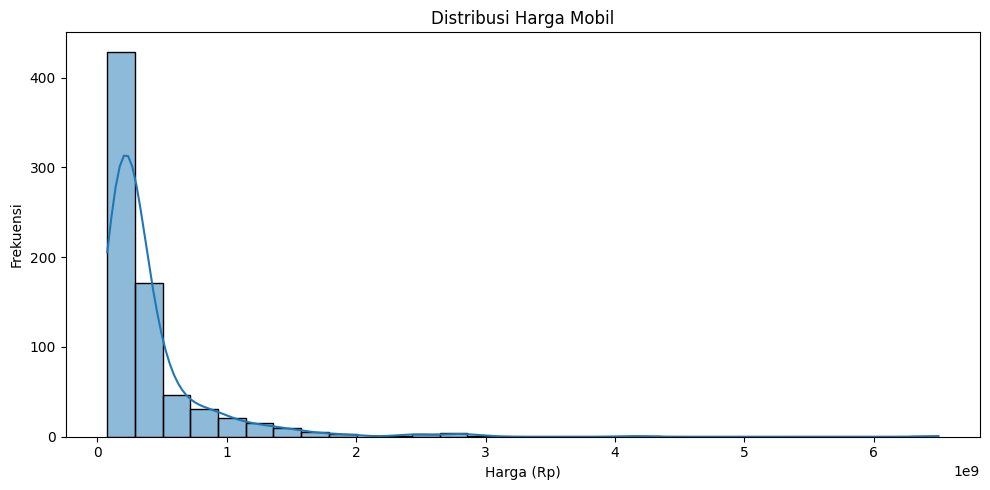

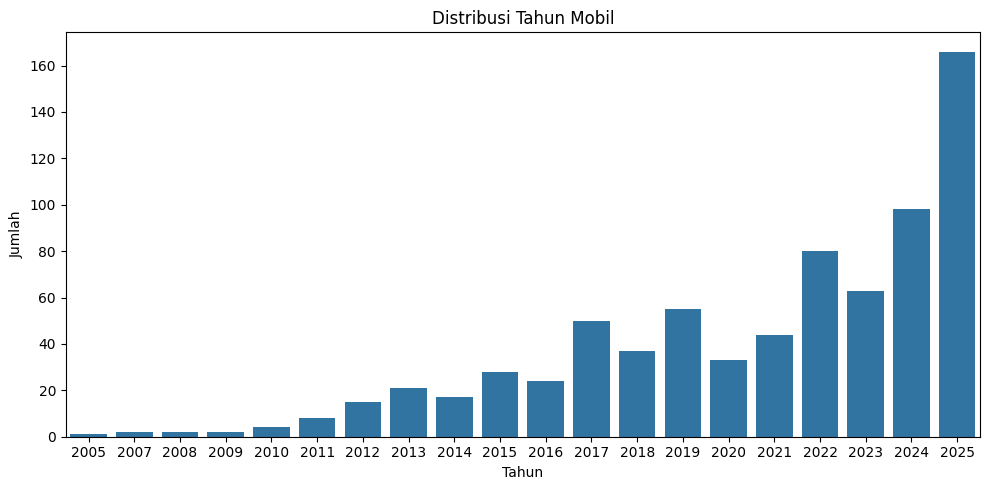

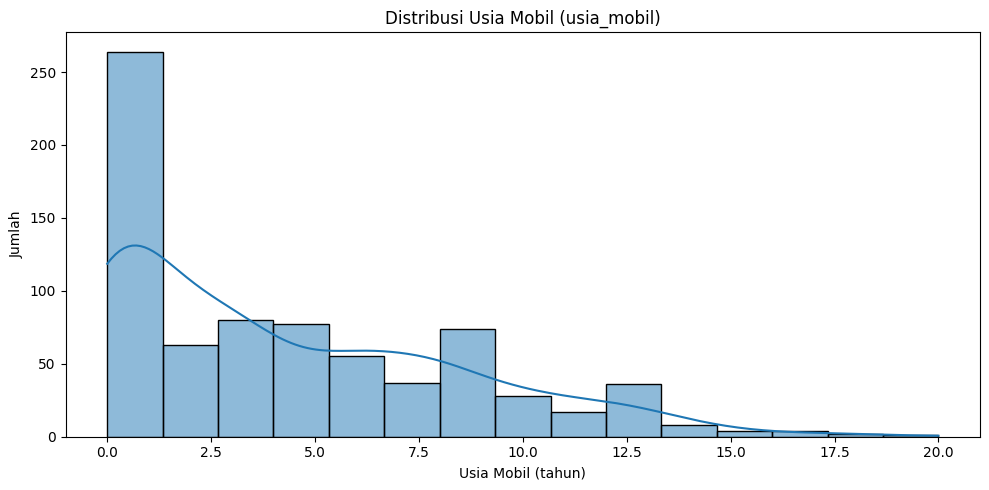

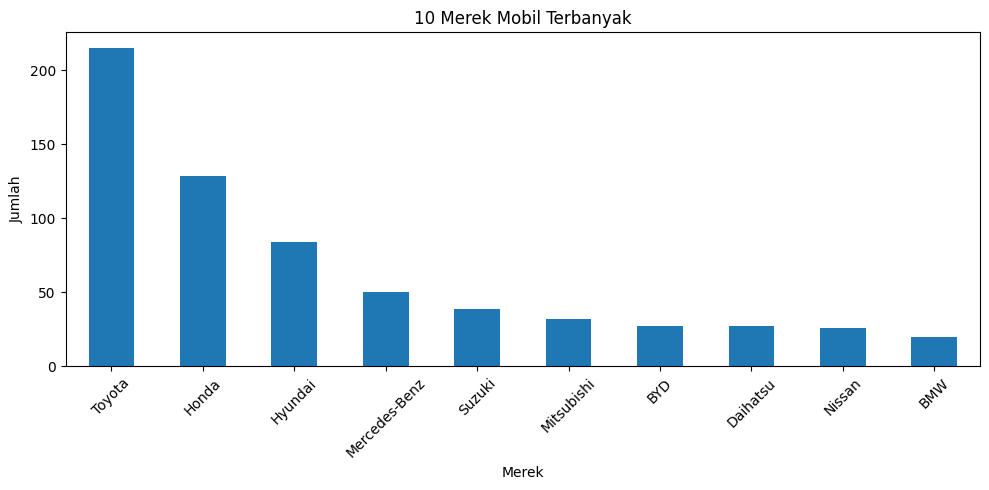

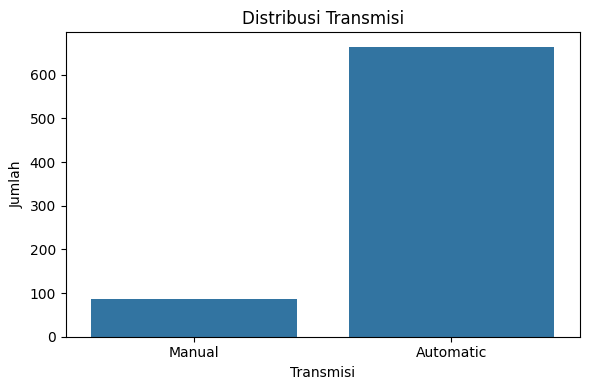

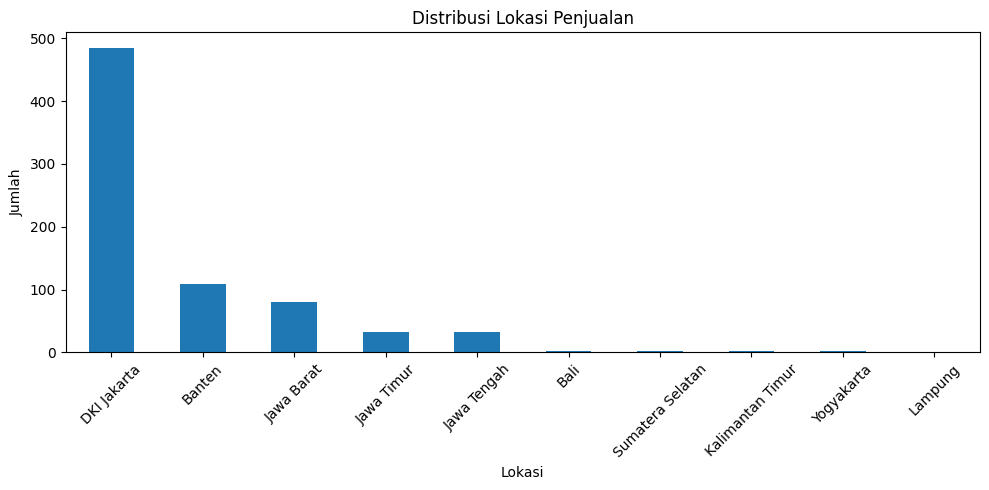

In [1]:
# ==== 1. Import dan Load Dataset ====
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

# Baca data (ganti nama file jika perlu)
df = pd.read_csv("/content/drive/MyDrive/Projek/LEGOAS/all_data_page_1_to_10.csv")

# ==== 2. Ekstrak 'year' dari kolom 'title' ====
def extract_year(title):
    match = re.match(r"^(\d{4})", title)
    return int(match.group(1)) if match else None

df["tahun"] = df["title"].apply(extract_year)

# ==== 3. Bersihkan 'title' jadi 'model_clean' ====
def clean_model_name(title):
    title = re.sub(r"^\d{4}\s+", "", title)        # Hapus tahun di depan
    return title.split(" - ")[0].strip()           # Hilangkan promosi setelah ' - '

df["nama_mobil"] = df["title"].apply(clean_model_name)

# ==== 4. Tambah kolom 'brand' ====
df["brand"] = df["nama_mobil"].apply(lambda x: x.split()[0])

# ==== 5. Bersihkan kolom harga → 'price_clean' ====
# ==== 5. Bersihkan kolom harga → 'price_clean' ====
df["harga_mobil"] = pd.to_numeric(df["price"].str.replace("Rp", "").str.replace(".", ""), errors='coerce')

# ==== 6. Tambah kolom usia mobil → 'car_age' ====
current_year = datetime.now().year
df["usia_mobil"] = current_year - df["tahun"]

# ==== 7. Info Data ====
print("Info Data:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe(include='all'))

# ==== 8. Visualisasi Distribusi Harga ====
plt.figure(figsize=(10, 5))
sns.histplot(df["harga_mobil"], bins=30, kde=True)
plt.title("Distribusi Harga Mobil")
plt.xlabel("Harga (Rp)")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

# ==== 9. Visualisasi Distribusi Tahun ====
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="tahun", order=sorted(df["tahun"].dropna().unique()))
plt.title("Distribusi Tahun Mobil")
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

# ==== 10. Visualisasi Distribusi Usia Mobil ====
plt.figure(figsize=(10, 5))
sns.histplot(df["usia_mobil"].dropna(), bins=15, kde=True)
plt.title("Distribusi Usia Mobil (usia_mobil)")
plt.xlabel("Usia Mobil (tahun)")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

# ==== 11. Visualisasi Merek Mobil Terbanyak ====
plt.figure(figsize=(10, 5))
df["brand"].value_counts().head(10).plot(kind="bar")
plt.title("10 Merek Mobil Terbanyak")
plt.xlabel("Merek")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ==== 12. Visualisasi Transmisi ====
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="trans")
plt.title("Distribusi Transmisi")
plt.xlabel("Transmisi")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

# ==== 13. Visualisasi Lokasi ====
plt.figure(figsize=(10, 5))
df["loc"].value_counts().plot(kind="bar")
plt.title("Distribusi Lokasi Penjualan")
plt.xlabel("Lokasi")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
# df.to_csv('/content/drive/MyDrive/Projek/LEGOAS/data_bersih.csv', index=False)

In [3]:
df.head()

,title,price,img,desc,km,trans,loc,link,tahun,nama_mobil,brand,harga_mobil,usia_mobil
0,2019 Toyota Agya 1.2 TRD Hatchback - MANUAL FA...,Rp 120.000.000,https://img2.icarcdn.com/15961071/main-m_mobil...,NaN,30 - 35K KM,Manual,Jawa Timur,https://www.carmudi.co.id/dijual/toyota-agya-t...,2019,Toyota Agya 1.2 TRD Hatchback,Toyota,1.200000e+08,6
1,"2025 Toyota Rush 1.5 GR Sport SUV - 1,5 Matic ...",Rp 261.800.000,https://img2.icarcdn.com/34961071/main-m_mobil...,NaN,- KM,Automatic,Jawa Barat,https://www.carmudi.co.id/dijual/toyota-rush-g...,2025,Toyota Rush 1.5 GR Sport SUV,Toyota,2.618000e+08,0
2,"2025 Toyota Agya 1.2 G Hatchback - 1,2 Matic W...",Rp 143.800.000,https://img4.icarcdn.com/14961071/main-m_mobil...,NaN,- KM,Automatic,DKI Jakarta,https://www.carmudi.co.id/dijual/toyota-agya-g...,2025,Toyota Agya 1.2 G Hatchback,Toyota,1.438000e+08,0
3,2025 Toyota Alphard 2.5 G (Premium Color) MPV ...,Rp 1.386.500.000,https://img4.icarcdn.com/04961071/main-m_mobil...,NaN,- KM,Automatic,DKI Jakarta,https://www.carmudi.co.id/dijual/toyota-alphar...,2025,Toyota Alphard 2.5 G (Premium Color) MPV,Toyota,1.386500e+09,0
4,2018 Toyota Kijang Innova 2.0 V MPV - HARGA NE...,Rp 238.900.000,https://img2.icarcdn.com/93961071/main-m_mobil...,NaN,60 - 65K KM,Manual,DKI Jakarta,https://www.carmudi.co.id/dijual/toyota-kijang...,2018,Toyota Kijang Innova 2.0 V MPV,Toyota,2.389000e+08,7


In [4]:
# Mengecek Missing Value
missing_values_per_column = df.isnull().sum()
print(missing_values_per_column)

title            0
price            0
img              0
desc           750
km               0
trans            0
loc              0
link             0
tahun            0
nama_mobil       0
brand            0
harga_mobil      7
usia_mobil       0
dtype: int64


In [5]:
# periksa duplicate value
df.duplicated().sum()

np.int64(41)

In [6]:
df = df.drop(columns=["title", "price", "link", "desc","img", "usia_mobil"])  # kita gunakan car_age, bukan year


In [7]:
df

,km,trans,loc,tahun,nama_mobil,brand,harga_mobil
0,30 - 35K KM,Manual,Jawa Timur,2019,Toyota Agya 1.2 TRD Hatchback,Toyota,1.200000e+08
1,- KM,Automatic,Jawa Barat,2025,Toyota Rush 1.5 GR Sport SUV,Toyota,2.618000e+08
2,- KM,Automatic,DKI Jakarta,2025,Toyota Agya 1.2 G Hatchback,Toyota,1.438000e+08
3,- KM,Automatic,DKI Jakarta,2025,Toyota Alphard 2.5 G (Premium Color) MPV,Toyota,1.386500e+09
4,60 - 65K KM,Manual,DKI Jakarta,2018,Toyota Kijang Innova 2.0 V MPV,Toyota,2.389000e+08
...,...,...,...,...,...,...,...
745,45 - 50K KM,Automatic,DKI Jakarta,2022,Hyundai Creta 1.5 Prime SUV,Hyundai,2.650000e+08
746,40 - 45K KM,Automatic,DKI Jakarta,2020,Lexus RX 300 2.0 F Sport SUV,Lexus,8.990000e+08
747,40 - 45K KM,Automatic,DKI Jakarta,2021,Toyota Alphard 2.5 G MPV,Toyota,9.450000e+08
748,5 - 10K KM,Automatic,Banten,2021,Mercedes-Benz GLA200 1.3 AMG Line SUV,Mercedes-Benz,5.980000e+08


In [8]:
import numpy as np

def clean_km(km_str):
    try:
        if "-" in km_str:
            parts = km_str.replace("K", "").replace("KM", "").replace(",", "").replace(" ", "").split("-")
            return (int(parts[0]) + int(parts[1])) * 500
        elif km_str.strip() == "- KM" or km_str.strip() == "-" or km_str.strip() == "":
            return np.nan
        else:
            return int(km_str.replace("K", "").replace("KM", "").replace(",", "").replace(" ", "")) * 1000
    except:
        return np.nan

df["km_clean"] = df["km"].apply(clean_km)


In [9]:
df.isna().sum()

,0
km,0
trans,0
loc,0
tahun,0
nama_mobil,0
brand,0
harga_mobil,7
km_clean,750


In [10]:
df["km_clean"].fillna(df["km_clean"].median(), inplace=True)

<ipython-input-10-ba6161457419>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["km_clean"].fillna(df["km_clean"].median(), inplace=True)


In [11]:
df['km'].unique()

array(['30 - 35K KM', '- KM', '60 - 65K KM', '40 - 45K KM', '85 - 90K KM',
       '75 - 80K KM', '35 - 40K KM', '55 - 60K KM', '120 - 125K KM',
       '0 - 5K KM', '70 - 75K KM', '50 - 55K KM', '20 - 25K KM',
       '95 - 100K KM', '65 - 70K KM', '10 - 15K KM', '45 - 50K KM',
       '100 - 105K KM', '25 - 30K KM', '80 - 85K KM', '15 - 20K KM',
       '90 - 95K KM', '14000 KM', '30000 KM', '42000 KM', '29000 KM',
       '56000 KM', '35000 KM', '39000 KM', '55000 KM', '27000 KM',
       '11000 KM', '47000 KM', '97000 KM', '69000 KM', '66000 KM',
       '58000 KM', '32000 KM', '165 - 170K KM', '115000 KM', '40000 KM',
       '80000 KM', '60000 KM', '140 - 145K KM', '150 - 155K KM',
       '110 - 115K KM', '135 - 140K KM', '215 - 220K KM', '5 - 10K KM',
       '180 - 185K KM', '39627 KM', '105 - 110K KM', '97718 KM',
       '74029 KM', '14768 KM', '97817 KM', '28147 KM', '200 - 205K KM',
       '46945 KM', '43115 KM', '115 - 120K KM', '114000 KM',
       '125 - 130K KM', '170 - 175K KM', '

In [12]:
import numpy as np
import re

def parse_km(km_str):
    if pd.isna(km_str) or '- KM' in km_str:
        return np.nan

    # Pola 1: rentang dengan 'K KM', contoh: "30 - 35K KM"
    match_range = re.match(r'(\d+)\s*-\s*(\d+)K KM', km_str)
    if match_range:
        low = int(match_range.group(1))
        high = int(match_range.group(2))
        return (low + high) / 2 * 1000

    # Pola 2: angka tunggal dengan 'KM', contoh: "47000 KM"
    match_single = re.match(r'(\d+)\s*KM', km_str)
    if match_single:
        return int(match_single.group(1))

    return np.nan


In [13]:
df['km_clean'] = df['km'].apply(parse_km)

In [14]:
df['km_clean'] = df['km_clean'].fillna(df['km_clean'].median())

In [15]:
df.isna().sum()

,0
km,0
trans,0
loc,0
tahun,0
nama_mobil,0
brand,0
harga_mobil,7
km_clean,0


In [16]:
df = df.drop(columns=["km"])

In [17]:
df

,trans,loc,tahun,nama_mobil,brand,harga_mobil,km_clean
0,Manual,Jawa Timur,2019,Toyota Agya 1.2 TRD Hatchback,Toyota,1.200000e+08,32500.0
1,Automatic,Jawa Barat,2025,Toyota Rush 1.5 GR Sport SUV,Toyota,2.618000e+08,32500.0
2,Automatic,DKI Jakarta,2025,Toyota Agya 1.2 G Hatchback,Toyota,1.438000e+08,32500.0
3,Automatic,DKI Jakarta,2025,Toyota Alphard 2.5 G (Premium Color) MPV,Toyota,1.386500e+09,32500.0
4,Manual,DKI Jakarta,2018,Toyota Kijang Innova 2.0 V MPV,Toyota,2.389000e+08,62500.0
...,...,...,...,...,...,...,...
745,Automatic,DKI Jakarta,2022,Hyundai Creta 1.5 Prime SUV,Hyundai,2.650000e+08,47500.0
746,Automatic,DKI Jakarta,2020,Lexus RX 300 2.0 F Sport SUV,Lexus,8.990000e+08,42500.0
747,Automatic,DKI Jakarta,2021,Toyota Alphard 2.5 G MPV,Toyota,9.450000e+08,42500.0
748,Automatic,Banten,2021,Mercedes-Benz GLA200 1.3 AMG Line SUV,Mercedes-Benz,5.980000e+08,7500.0


In [18]:
# Data hasil encoding brand
brand_labels = {
    'Audi': 0, 'BMW': 1, 'BYD': 2, 'Chery': 3, 'Chevrolet': 4, 'Daihatsu': 5, 'Datsun': 6,
    'Ferrari': 7, 'Ford': 8, 'GWM': 9, 'Honda': 10, 'Hyundai': 11, 'Jeep': 12, 'KIA': 13,
    'Land': 14, 'Lexus': 15, 'MG': 16, 'MINI': 17, 'Mazda': 18, 'Mercedes-Benz': 19,
    'Mitsubishi': 20, 'Nissan': 21, 'Peugeot': 22, 'Porsche': 23, 'Suzuki': 24,
    'Toyota': 25, 'Wuling': 26
}

# Data hasil encoding transmisi
trans_labels = {
    'Automatic': 0,
    'Manual': 1
}

# Data hasil encoding lokasi
loc_labels = {
    'Bandung': 0, 'Bekasi': 1, 'Depok': 2, 'Jakarta': 3, 'Malang': 4,
    'Medan': 5, 'Semarang': 6, 'Surabaya': 7, 'Tangerang': 8, 'Yogyakarta': 9
}

# Mengganti kolom dengan label encoded-nya
df['brand'] = df['brand'].map(brand_labels)
df['trans'] = df['trans'].map(trans_labels)
df['loc'] = df['loc'].map(loc_labels)


In [19]:
df

,trans,loc,tahun,nama_mobil,brand,harga_mobil,km_clean
0,1,NaN,2019,Toyota Agya 1.2 TRD Hatchback,25,1.200000e+08,32500.0
1,0,NaN,2025,Toyota Rush 1.5 GR Sport SUV,25,2.618000e+08,32500.0
2,0,NaN,2025,Toyota Agya 1.2 G Hatchback,25,1.438000e+08,32500.0
3,0,NaN,2025,Toyota Alphard 2.5 G (Premium Color) MPV,25,1.386500e+09,32500.0
4,1,NaN,2018,Toyota Kijang Innova 2.0 V MPV,25,2.389000e+08,62500.0
...,...,...,...,...,...,...,...
745,0,NaN,2022,Hyundai Creta 1.5 Prime SUV,11,2.650000e+08,47500.0
746,0,NaN,2020,Lexus RX 300 2.0 F Sport SUV,15,8.990000e+08,42500.0
747,0,NaN,2021,Toyota Alphard 2.5 G MPV,25,9.450000e+08,42500.0
748,0,NaN,2021,Mercedes-Benz GLA200 1.3 AMG Line SUV,19,5.980000e+08,7500.0


In [20]:
# df.to_csv('/content/drive/MyDrive/Projek/LEGOAS/data_bersih_EDA4.csv', index=False)

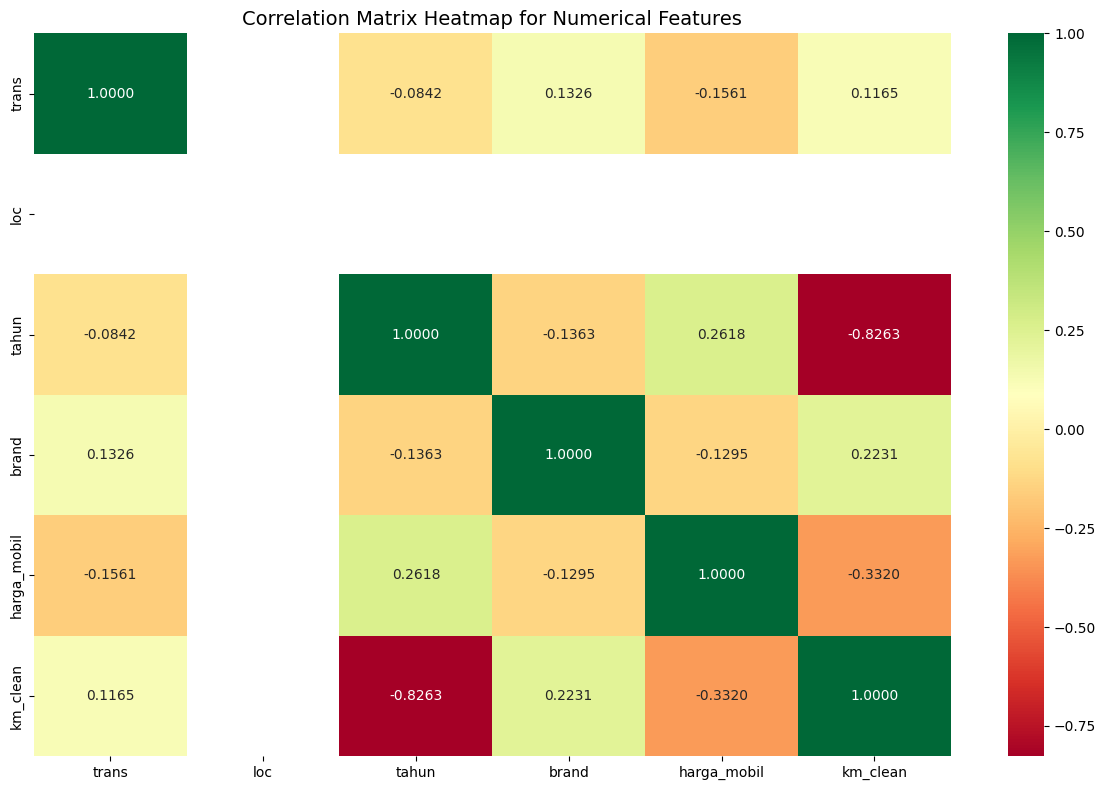

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hanya pilih kolom numerik untuk korelasi
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap="RdYlGn", cbar=True)
plt.title('Correlation Matrix Heatmap for Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()


In [22]:
# karna baris harga_mobil ada Missing Value
df = df.dropna(subset=['harga_mobil'])


# Modeling

In [23]:
nama_feature = ['tahun', 'km_clean', 'brand', 'trans']

x = df[nama_feature].values
y = df['harga_mobil'].values
x.shape, y.shape

((743, 4), (743,))

In [24]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=70)
y_test.shape

(149,)

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(X_test)

In [26]:
score = lr.score(x_train, y_train)
print ('akurasi model Lr=',score)

akurasi model Lr= 0.1595875437701917


In [27]:
# 'tahun', 'km_clean', 'brand', 'trans'
input_data = np.array([[2023, 100, 2, 1]])


prediction = lr.predict(input_data)
print('Estimasi harga mobil dalam EUR :', prediction)


Estimasi harga mobil dalam EUR : [4.74530424e+08]


In [28]:
input_data = np.array([[2023, 100, 2, 1]])
prediction = lr.predict(input_data)

# Konversi ke Rupiah
kurs_eur_to_idr = 10  # bisa kamu sesuaikan dengan kurs terbaru
harga_rupiah = prediction[0] * kurs_eur_to_idr

print('Estimasi harga mobil dalam Rupiah : Rp', f'{harga_rupiah:,.0f}')


Estimasi harga mobil dalam Rupiah : Rp 4,745,304,236


In [30]:
import pickle
from math import pi
import joblib

file = 'model harga mobil.sav'
pickle.dump(lr, open(file, 'wb'))

In [ ]:
# df.to_csv('/content/drive/MyDrive/Projek/LEGOAS/data_bersih_EDA.csv', index=False)